In [15]:
#Importing the required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# Load dataset
df = pd.read_csv('titanic.csv')

In [17]:
# Drop unnecessary columns
columns_to_drop = ['SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked']
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [18]:
# Handling null values in Age(filling the median age grouped by Gender and Class)
df['Age'] = df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

In [60]:
# Prepare the data and Label encoding for Sex column
titanic_data = df.dropna(subset=['Sex', 'Pclass', 'Age', 'Fare', 'Survived']).copy()
sex_encoder = LabelEncoder()
titanic_data['Sex'] = sex_encoder.fit_transform(titanic_data['Sex'])

In [61]:
# Training the Random Forest model and predicting outcomes
X = titanic_data[['Pclass', 'Sex', 'Age', 'Fare']]
y = titanic_data['Survived']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [62]:
# Comparing the predicted outcomes with the actual values in the test set to determine accuracy
print("Random Forest Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Random Forest Model Accuracy: 0.8156424581005587

Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.87      0.85       105
         1.0       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



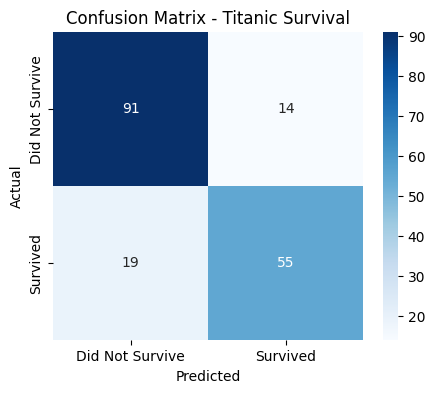

In [63]:
# Confusion Matrix to evaluate model performance
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Did Not Survive','Survived'],
    yticklabels=['Did Not Survive','Survived'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Titanic Survival")
plt.show()

In [58]:
# Method to predict survival for new user-provided data
def predict_survival(pclass, sex, age, fare):
    sex_val = sex_encoder.transform([sex])[0]
    input_df = pd.DataFrame([[pclass, sex_val, age, fare]],columns=['Pclass', 'Sex', 'Age', 'Fare'])
    pred = rf_model.predict(input_df)[0]
    return "Survived" if pred == 1 else "Did not survive"


In [59]:
# Example test runs
print(predict_survival(3, 'male', 25, 7.25))
print(predict_survival(1, 'female', 30, 80.0))


Did not survive
Survived
